# Estudando distribuições de Normal

O objetivos das próximas aulas é entender os conceitos de distribuição de probabilidades, dentre elas, as mais conhecidas **Binomial**, **Normal** e **de Poisson**.

## Problemas motivadores

1) Em uma prova de 10 questões cada acerto vale 1 ponto. A média de uma turma é 6,7 e o desvio padrão 1,2. Admitindo uma distribuição normal, determine:

a) a porcentagem de estudantes que obtiveram 6 pontos;

b) o grau máximo dos 10% mais baixos da classe;

c) o grau mínimo dos 10% mais altos da classe.

2) Sabendo que a média de peso de recém nascidos é de 3kg com um desvio padrão de 1Kg, Determine a probabilidade de termos bêbes abaixo de 2kg e, assim antecipar e planejar as necessidades de atendimento especial dos recém nascidos (alimentação, maior período de internação etc.). Sabendo que um hospital realiza cerca de 20 partos por dia, quantos leitos precisam ser reservados para atendimento a esses casos? Faça um histograma das probabilidades de nascimentos (X=1, 2, 3, ...).

A forma da curva gerada não se assemelha muito a uma distribuição normal, pois estamos lidando com um número reduzido de dados (apenas 10 amostras), o que faz com que o histograma fique instável e sujeito a flutuações aleatórias.

Número de questões: 10

Média da turma: 6,7

Desvio padrão: 1,2

In [1]:
from scipy.stats import norm

# Dados
media = 6.7
desvio_padrao = 1.2

# Limites com correção de continuidade
lim_inf = 5.5
lim_sup = 6.5

# Cálculo dos z-scores
z_inf = (lim_inf - media) / desvio_padrao
z_sup = (lim_sup - media) / desvio_padrao

# Cálculo da probabilidade entre os dois z-scores
prob = norm.cdf(z_sup) - norm.cdf(z_inf)
porcentagem = prob * 100

print(f"Aproximadamente {porcentagem:.2f}% dos estudantes tiraram nota 6.")

Aproximadamente 27.52% dos estudantes tiraram nota 6.


In [2]:
# b) o grau máximo dos 10% mais baixos da classe

from scipy.stats import norm

media = 6.7
desvio_padrao = 1.2

# Percentil 10 (10% mais baixos)
percentil_10 = norm.ppf(0.10, media, desvio_padrao)#ppf -> função quantil

print(f"O grau máximo dos 10% mais baixos da classe é aproximadamente {percentil_10:.2f}")

O grau máximo dos 10% mais baixos da classe é aproximadamente 5.16


In [3]:
# c) o grau mínimo dos 10% mais altos da classe.

from scipy.stats import norm

media = 6.7
desvio_padrao = 1.2

# Percentil 90 (10% mais altos)
percentil_90 = norm.ppf(0.90, media, desvio_padrao)

print(f"O grau mínimo dos 10% mais altos da classe é aproximadamente {percentil_90:.2f}")


O grau mínimo dos 10% mais altos da classe é aproximadamente 8.24


Probabilidade de um bebê nascer abaixo de 2kg: 0.1587 (15.87%)
Leitos que devem ser reservados (95% dos dias): 6


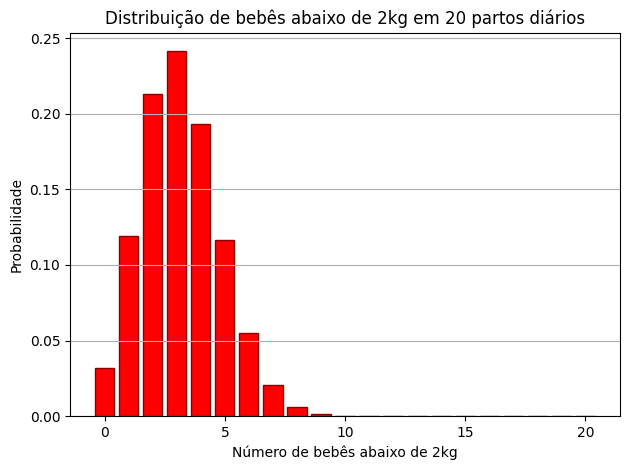

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# Parâmetros da distribuição normal (peso dos bebês)
media_peso = 3  # em kg
desvio_peso = 1

# Probabilidade de um bebê nascer com menos de 2kg
p_baixo_peso = norm.cdf(2, loc=media_peso, scale=desvio_peso)
print(f"Probabilidade de um bebê nascer abaixo de 2kg: {p_baixo_peso:.4f} ({p_baixo_peso * 100:.2f}%)")

# Reservar leitos para cobrir 95% dos dias (percentil 95 da binomial)
n_partos = 20
leitos_reservados = binom.ppf(0.95, n=n_partos, p=p_baixo_peso)
print(f"Leitos que devem ser reservados (95% dos dias): {int(leitos_reservados)}")

# Distribuição binomial: número de bebês abaixo de 2kg em 20 partos
x = np.arange(0, n_partos + 1)
probabilidades = binom.pmf(x, n=n_partos, p=p_baixo_peso)

# Gráfico em vermelho
plt.bar(x, probabilidades, color='red', edgecolor='darkred')
plt.title('Distribuição de bebês abaixo de 2kg em 20 partos diários')
plt.xlabel('Número de bebês abaixo de 2kg')
plt.ylabel('Probabilidade')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
